# sta_lta_test

This script is an sta_lta_example on `.mseed` file with display of found results and ability to tune search parameters.

In [61]:
waveform_path = 'C:/data/NYSH/archives/NYSH/IM.NYSH.00.EHZ__20210401T000000Z__20210402T000000Z.mseed'

In [62]:
import numpy as np

In [63]:
from obspy import read
from obspy.signal.trigger import recursive_sta_lta, trigger_onset

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
stream = read(waveform_path); stream, stream[0].stats.sampling_rate

(1 Trace(s) in Stream:
IM.NYSH.00.EHZ | 2021-04-01T00:00:00.860000Z - 2021-04-02T00:00:02.860000Z | 100.0 Hz, 8640201 samples,
 100.0)

In [147]:
stream.filter("bandpass", freqmin = 0.075, freqmax = 5.)

1 Trace(s) in Stream:
IM.NYSH.00.EHZ | 2021-04-01T00:00:00.860000Z - 2021-04-02T00:00:02.860000Z | 100.0 Hz, 8640201 samples

In [148]:
df = stream[0].stats.sampling_rate
sta_length = 1.  # seconds
lta_length = 10.  # seconds
sta_lta_ratio_on = 2.5  # on trigger ratio
sta_lta_ratio_off = 0.5  # off trigger ratio

In [149]:
cft = recursive_sta_lta(stream[0].data, int(sta_length*df), int(lta_length*df))
trigs = trigger_onset(cft, sta_lta_ratio_on, sta_lta_ratio_off)
trigs = trigs[:, 0]

In [150]:
len(trigs)

1047

## Plot positives

In [151]:
plot_length = 4.  # seconds
plot_shift = -0.  # shift from trigger-on point in seconds (negative means left shift) 

plot_length_samples = int(plot_length * df)
plot_shift_samples = int(plot_shift * df)

plots_per_iteration = 3

In [152]:
def plot_data(data, n_axes=1):
    
    fig, axes = plt.subplots(n_axes, 1, figsize = (8, 4), dpi = 90)
    
    if n_axes == 1:
        axes = [axes]
    
    for i, ax in enumerate(axes):
        plot = ax.plot(data[i, :], lw=0.5, color='#000')
        
    fig.tight_layout()

In [153]:
i = 0
max_i = len(trigs)

i = 3


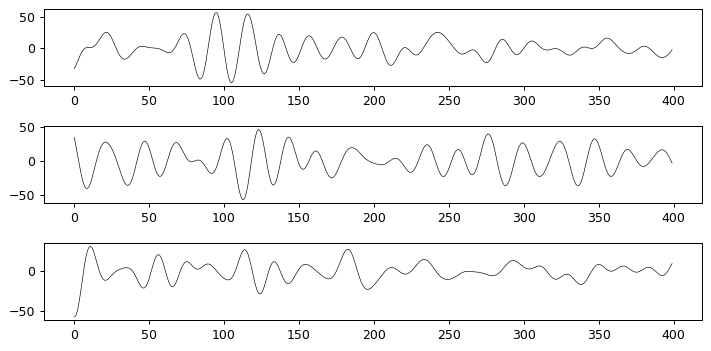

In [154]:
data = np.zeros(shape=(plots_per_iteration, plot_length_samples))

for j in range(plots_per_iteration):
    
    start = trigs[i] - plot_shift_samples
    if start < 0:
        start = 0

    data[j, :] = stream[0].data[start : start + plot_length_samples]
    i += 1
    
plot_data(data, plots_per_iteration)
print(f'i = {i}')